In [41]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
def Train_data_sort():
    
  with open ('datapoints.txt', "r") as Train_points:
    points = [point.strip("\n") for point in Train_points.readlines()]
#Delete first line  
  points.pop(0)
#Create empty lists
  data_points = [data.split(",") for data in points]
  pichu_list =[]
  pikachu_list =[]
  
  for datapoint in data_points:
    datapoint = [i.strip() for i in datapoint]
        
    if datapoint [2] == "0":
        pichu_list.append(datapoint)
            
    elif datapoint [2] == "1":
        pikachu_list.append(datapoint)
# Save data in files 
  with open ('pichu.txt', "w") as f_pichu:
    for item in pichu_list:
      f_pichu.write(','. join(item)+"\n")
  with open ('pikachu.txt', "w") as f_pikacu:
    for item in pikachu_list:
      f_pikacu.write(','.join(item)+"\n")
    
    
  print("\npichu-list")
  for item in pichu_list:
    print(item)
    
  print("\npikaachu-list")  
  for item in pikachu_list:
    print(item)  
  
Train_data_sort()

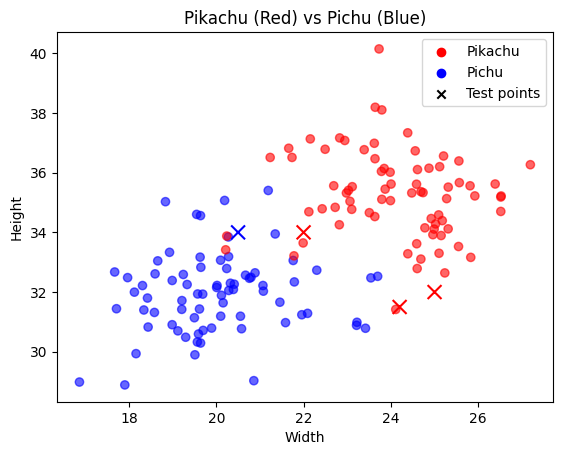

Sample with (Width, height):(25.0, 32.0) classified as Pikachu
Sample with (Width, height):(24.2, 31.5) classified as Pikachu
Sample with (Width, height):(22.0, 34.0) classified as Pikachu
Sample with (Width, height):(20.5, 34.0) classified as Pichu


In [85]:

# Using files and creating columns
pichu_data = pd.read_csv('pichu.txt', header = None, names= ['width','height','label'])
pichu_data['label']= 'Pichu'
Pikachu_data = pd.read_csv('pikachu.txt', header = None, names= ['width','height','label'])
Pikachu_data['label']= 'Pikachu'

# Combine training data 
train_data = pd.concat([pichu_data,Pikachu_data], ignore_index= True)

Test_Points = pd.DataFrame({
     'Width' : [ 25, 24.2, 22, 20.5],
     'Height': [32, 31.5, 34, 34],
     'label' : ['Pikachu', 'Pikachu', 'Pikachu','Pichu']})
def plot_points():
     xtest = Test_Points ['Width'] 
     ytest = Test_Points['Height']
     colors_test = ['red' if label == 'Pikachu' else 'blue' for label in Test_Points ['label']]

     xtrain = train_data ['width'] 
     ytrain = train_data['height']
     colors_train = ['red' if label == 'Pikachu' else 'blue' for label in train_data['label']]


     plt.scatter(xtest, ytest, color = colors_test, marker='x', s = 100)
     plt.scatter(xtrain, ytrain,color =  colors_train, alpha = 0.6)
     plt.xlabel("Width")
     plt.ylabel("Height")
     plt.title("Pikachu (Red) vs Pichu (Blue)")

     for label in['Pikachu', 'Pichu']:
          plt.scatter([], [],  color = 'red' if label == 'Pikachu' else 'blue',label = label)
     plt.scatter([],[], color = 'black', marker = 'x', label = 'Test points')

     plt.legend()
     plt.show()
plot_points()
for i, row in Test_Points.iterrows():
     print(f"Sample with (Width, height):({row['Width']}, {row['Height']}) classified as {row['label']}")


Test points (24.0 34.0)
Slamp with (width):(height) (24.0):(34.0) classified as Pikachu with 10 votes


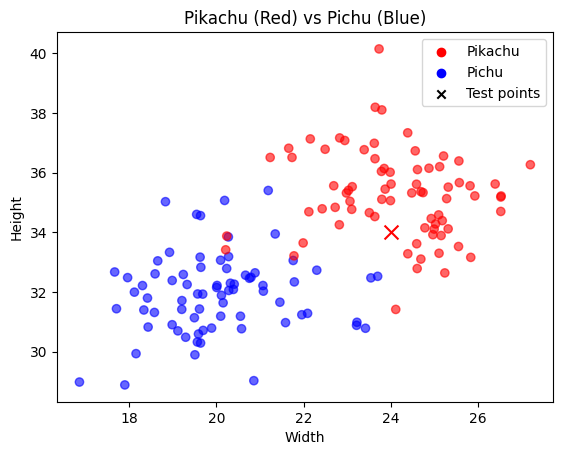

In [95]:
def user_points():
    while True:
        try:
            width = float(input("Write a positive number for width:"))
            height = float(input("Write a postive number for height:"))
            if width < 0 or height < 0 :
                raise ValueError(" Width and height must be positive numbers")
                
            test_point = pd.DataFrame({'Width':[width], 'Height':[height]})
            return test_point
    
        except ValueError as err:
            print(f"Invalid input{err}")
user_test_point = user_points()



def pichu_or_pikachu(x1, x2, y1, y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

# List to hold distances  
distans_with_label =[]


test_x,test_y = user_test_point['Width'].values[0], user_test_point['Height'].values[0]
print (f"Test points ({test_x} {test_y})")

# Loop through each training point   
for j, train_point in train_data.iterrows():
    train_x = train_point['width']
    train_y = train_point['height']
       
        
    
    distans = pichu_or_pikachu(test_x, train_x, test_y, train_y)
        
    distans_with_label.append(( distans, train_point['label']))
        
    
# Sort the distances to find the nearest points       
distans_with_label.sort(key = lambda x: x[0])
nearest_lables = [label for _,label in distans_with_label[:10]]


predicted_label = max(set(nearest_lables), key=nearest_lables.count)
vote_acount = nearest_lables.count(predicted_label)
print(f"Slamp with (width):(height) ({test_x}):({test_y}) classified as {predicted_label} with {vote_acount} votes")


def plot_points():
     xtest = user_test_point ['Width'] 
     ytest = user_test_point['Height']
     colors_test = ['red' if predicted_label == 'Pikachu' else 'blue']

     xtrain = train_data ['width'] 
     ytrain = train_data['height']
     colors_train = ['red' if label == 'Pikachu' else 'blue' for label in train_data['label']]


     plt.scatter(xtest, ytest, color = colors_test, marker='x', s = 100)
     plt.scatter(xtrain, ytrain,color =  colors_train, alpha = 0.6)
     plt.xlabel("Width")
     plt.ylabel("Height")
     plt.title("Pikachu (Red) vs Pichu (Blue)")

     for label in['Pikachu', 'Pichu']:
          plt.scatter([], [],  color = 'red' if label == 'Pikachu' else 'blue',label = label)
     plt.scatter([],[], color = 'black', marker = 'x', label = 'Test points')

     plt.legend()
     plt.show()
plot_points()